In [1]:
import pandas as pd
import numpy as pd
from logreg_functions import *
from knapsack_functions import *

In [2]:
full_df = build_training_set(num_instances=1000, num_items = 5)

92.0 IS THE OPTIMAL VALUE
91.0 IS THE OPTIMAL VALUE
79.0 IS THE OPTIMAL VALUE
86.0 IS THE OPTIMAL VALUE
119.0 IS THE OPTIMAL VALUE
71.0 IS THE OPTIMAL VALUE
82.0 IS THE OPTIMAL VALUE
55.0 IS THE OPTIMAL VALUE
88.0 IS THE OPTIMAL VALUE
99.0 IS THE OPTIMAL VALUE
94.0 IS THE OPTIMAL VALUE
92.0 IS THE OPTIMAL VALUE
74.0 IS THE OPTIMAL VALUE
116.0 IS THE OPTIMAL VALUE
98.0 IS THE OPTIMAL VALUE
129.0 IS THE OPTIMAL VALUE
88.0 IS THE OPTIMAL VALUE
127.0 IS THE OPTIMAL VALUE
69.0 IS THE OPTIMAL VALUE
117.0 IS THE OPTIMAL VALUE
137.0 IS THE OPTIMAL VALUE
62.0 IS THE OPTIMAL VALUE
113.0 IS THE OPTIMAL VALUE
112.0 IS THE OPTIMAL VALUE
122.0 IS THE OPTIMAL VALUE
100.0 IS THE OPTIMAL VALUE
87.0 IS THE OPTIMAL VALUE
36.0 IS THE OPTIMAL VALUE
101.0 IS THE OPTIMAL VALUE
89.0 IS THE OPTIMAL VALUE
73.0 IS THE OPTIMAL VALUE
71.0 IS THE OPTIMAL VALUE
124.0 IS THE OPTIMAL VALUE
78.0 IS THE OPTIMAL VALUE
79.0 IS THE OPTIMAL VALUE
70.0 IS THE OPTIMAL VALUE
60.0 IS THE OPTIMAL VALUE
110.0 IS THE OPTIMAL VALUE

/Users/nedimozden/Desktop/CMOR-Research/CMOR_Research/Code/knapsack_functions.py:651: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  full_df = pd.concat(all_dfs, ignore_index=True)


In [ ]:
# Suppose full_df is your big dataset (from build_training_set)
clf, metrics, data = train_logreg(full_df)
print(metrics)

{'roc_auc': 0.9871505368236927, 'accuracy': 0.9438294382943829, 'f1': 0.8683957732949087}


/Users/nedimozden/.pyenv/versions/cmor441/lib/python3.10/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/nedimozden/.pyenv/versions/cmor441/lib/python3.10/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/nedimozden/.pyenv/versions/cmor441/lib/python3.10/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/nedimozden/.pyenv/versions/cmor441/lib/python3.10/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: divide by zero encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/Users/nedimozden/.pyenv/versions/cmor441/lib/python3.10/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: overflow encou

In [6]:
X_train, X_test, y_train, y_test = data[0], data[1], data[2], data[3]

coef_df = inspect_logreg_coefficients(clf, X_train)

                 feature      coef
23         has_incumbent -2.673291
8    total_value_fixed_1  2.304734
25          node_rel_gap -1.864390
24              node_gap -1.663400
18   branch_parent_value -1.387699
4            num_fixed_1 -0.853010
16     branch_parent_dir -0.766554
22         incumbent_val -0.763127
1           lp_objective  0.631479
0                  depth -0.552609
3              num_fixed -0.552609
6              fix_ratio -0.552609
14     frac_var_fraction -0.494615
2                  slack -0.487276
7   total_weight_fixed_1 -0.458396
17  branch_parent_weight  0.362476
11       frac_var_weight -0.218964
21      open_nodes_count  0.161932
5            num_fixed_0  0.161932
19   branch_parent_ratio  0.153923
12        frac_var_value -0.149666
13        frac_var_ratio -0.134371
9         frac_var_index -0.018054
10   frac_var_normalized -0.018054
20             visit_idx -0.011908
15     branch_parent_var  0.004193


In [7]:
probs, preds = prediction_distribution(clf, X_test)

Proportion predicted 1: 0.23329233292332924


/Users/nedimozden/.pyenv/versions/cmor441/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/nedimozden/.pyenv/versions/cmor441/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/nedimozden/.pyenv/versions/cmor441/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/nedimozden/.pyenv/versions/cmor441/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/nedimozden/.pyenv/versions/cmor441/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/nedimozden/.pyenv/versions/cmor441/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


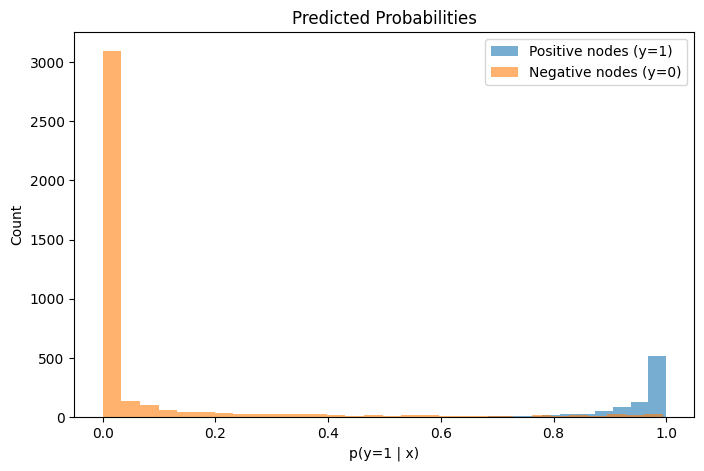

In [10]:
import matplotlib.pyplot as plt

def plot_probability_histogram(probs, y_test):
    plt.figure(figsize=(8,5))
    plt.hist(probs[y_test==1], bins=30, alpha=0.6, label="Positive nodes (y=1)")
    plt.hist(probs[y_test==0], bins=30, alpha=0.6, label="Negative nodes (y=0)")
    plt.legend()
    plt.title("Predicted Probabilities")
    plt.xlabel("p(y=1 | x)")
    plt.ylabel("Count")
    plt.show()

plot_probability_histogram(probs, y_test)

In [11]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, preds)
print(cm)


[[3700  234]
 [  40  904]]
